# Import libs

In [28]:
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt

In [9]:
from shapely.geometry import Point, LineString
import plotly_express as px
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

### Function that can generate a graph by providing addresses or coordinates

In [14]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
# Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’ 
    if loc_type == "address":
            G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
            G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

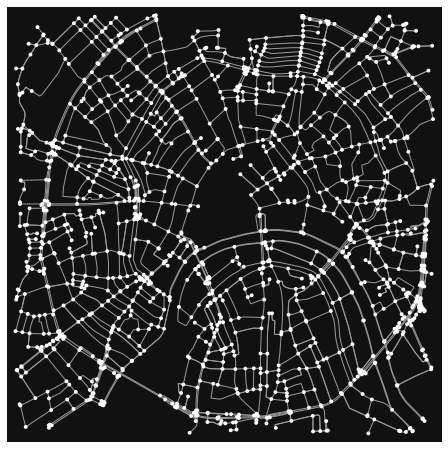

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [17]:
G = create_graph('Moscow', 2500, 'drive')
ox.plot_graph(G)

# Routing

### Before calculating the routes, we also need to impute missing edge speeds and add travel times to the Graph

/Users/nikitapronin/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/nikitapronin/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


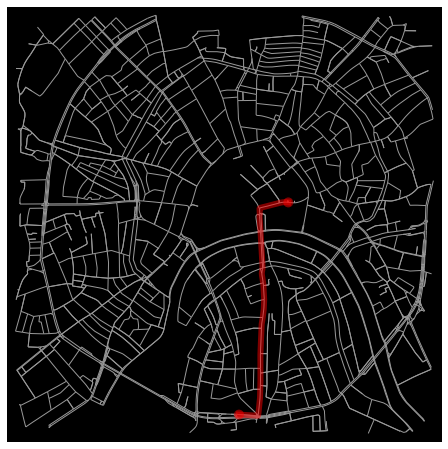

In [21]:
G = ox.add_edge_speeds(G) #Impute
G = ox.add_edge_travel_times(G) #Travel time
start = (55.7513, 37.6292)
end = (55.7302, 37.6204)
start_node = ox.get_nearest_node(G, start)
end_node = ox.get_nearest_node(G, end)
# Calculate the shortest path
route = nx.shortest_path(G, start_node, end_node, weight='travel_time')
#Plot the route and street networks
ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k');